In [1]:
## Preliminary

In [2]:
#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV

!pip install mitosheet 
import mitosheet 

!pip install xgboost
import xgboost

%config InlineBackend.figure_format = "svg"

In [3]:
#df = pd.read_csv('../datasets/train.csv')

In [4]:
##Louis
df = pd.read_csv('train.csv')

In [5]:
#df.head()

## Deleted columns property_id
##df.drop(['property_id'], axis=1, inplace=True)

In [6]:
#df.describe()

In [7]:
########################################################################


#Data cleaning

########################################################################

In [8]:
# property_bathrooms

In [9]:
df.property_bathrooms.isna().sum()

12

In [10]:
df['property_bathrooms'] = df['property_bathrooms'].fillna(1)

In [11]:
# property_bedrooms

In [12]:
df.property_bedrooms.isna().sum()

9

In [13]:
df['property_bedrooms'] = df['property_bedrooms'].fillna(1)

In [14]:
# property_beds

In [15]:
df['property_beds'] = df['property_beds'].fillna(2)

In [16]:
# booking_min_nights

In [17]:
df = df[df['booking_min_nights'] <= 10]

NumExpr defaulting to 8 threads.


In [18]:
# reviews_num

In [19]:
df = df[df['reviews_num'] <= 40]

In [20]:
# reviews_rating

In [21]:
df['reviews_rating'] = df['reviews_rating'].fillna(0)

In [22]:
# reviews_per_month

In [23]:
df = df[df['reviews_per_month'] <= 10]

In [24]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [25]:
# property_amenities

In [26]:
df = df.dropna(subset=['property_amenities'])

In [27]:
# target

In [28]:
df = df[df['target'] <= 500]

In [29]:
########################################################################

#interesting functions:

########################################################################


#df.describe()
#df.head()
#df.property_bathrooms.isna().sum()
#property_type opsplitsen in categorieen heb ik staan in mn v3

####heatmap
#sns.set(font_scale=0.6)
#plt.figure(figsize=(8,8))
#sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)


#####Calculate the correlation of each feature with the target variable 
#import pandas as pd
#pd.set_option('display.max_rows', None) ##unlimited rows 
#pd.set_option('display.max_columns', None)
#features = df.drop(['target'], axis=1)
#target = df['target']
#correlations = features.apply(lambda x: x.corr(target))
#print(correlations)


In [30]:
#correlation of all features with the target
#we are not using linear correlation, buth rather a relationship (spearman) based on ranks

import pandas as pd
import scipy.stats as stats

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Select the features and target variable
features = df.drop(['target'], axis=1)
target = df['target']

# Calculate the Spearman correlation between each feature and the target variable
corr_with_target = features.apply(lambda x: stats.spearmanr(x, target)[0]).sort_values(ascending=False)

# Print the correlation of each feature with the target variable
print(corr_with_target)


property_amenities          0.048078
property_last_updated       0.035553
reviews_first               0.032215
property_type               0.013469
host_id                     0.012037
reviews_rating              0.011007
property_bed_type           0.009782
booking_max_nights          0.005315
property_room_type          0.003809
reviews_last                0.002815
booking_availability_365    0.002732
booking_availability_60     0.002649
booking_min_nights          0.002251
reviews_per_month           0.001674
booking_availability_90     0.001236
property_scraped_at        -0.000257
property_lon               -0.001176
property_lat               -0.001698
host_verified              -0.006910
booking_availability_30    -0.007578
property_max_guests        -0.008589
property_bedrooms          -0.009299
property_bathrooms         -0.011377
property_beds              -0.016755
property_id                -0.018467
booking_price_covers       -0.021916
reviews_num                -0.026275
b

In [31]:
#scatterplot code

#import matplotlib.pyplot as plt

#x= df['property_max_guests']
#y= df['target']

#plt.scatter(x, y)

# Add labels and a title
#plt.xlabel('Guests')
#plt.ylabel('Target')
#plt.title('Scatter Plot')

# Show the plot
#plt.show()


In [32]:
########################################################################

####EDA 
###LOUIS

########################################################################


In [33]:
#EDA
#booking_price_covers
#how many people does the price per night cover (can be lower than the max. guests in which case an additional fee is asked per extra person, which is not provided here)

#dus eigenlijk: als je het verschil berekent tussen (max_guests - booking_price_covers), hoe groter dit is, hoe lager de target is. Een appa voor 4 personen aan 90 euro geadverteerd, terwijl er 8 personen kunnen slapen en het totaal dan 170 euro zou zijn.
#drop

print(df['booking_price_covers'].describe())

count    4152.000000
mean        1.462428
std         0.999896
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: booking_price_covers, dtype: float64


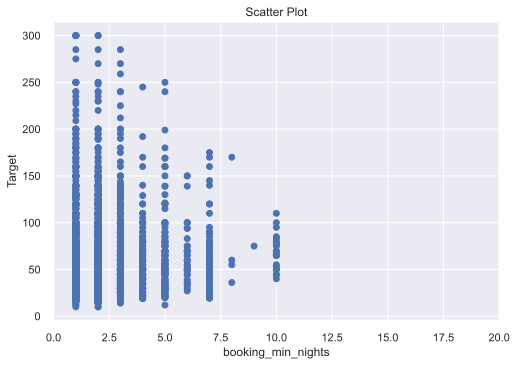

In [67]:
#EDA
#booking_min_nights
#is relevant in other models, but not really here

import matplotlib.pyplot as plt

x= df['booking_min_nights']
y= df['target']

plt.scatter(x, y)

# Add labels and a title
plt.xlabel('booking_min_nights')
plt.ylabel('Target')
plt.title('Scatter Plot')
plt.xlim(0, 20)

# Show the plot
plt.show()


In [56]:
#EDA
#booking_availability_30
#booking_availability_60
#booking_availability_90
#booking_availability_365

corr_matrix = df[['booking_availability_30', 'booking_availability_60', 'booking_availability_90', 'booking_availability_365', 'target']].corr()
corr_matrix = corr_matrix.rename(columns={'booking_availability_30': '30',
                                          'booking_availability_60': '60',
                                          'booking_availability_90': '90',
                                          'booking_availability_365': '365'})
corr_matrix = corr_matrix.rename(index={'booking_availability_30': '30',
                                         'booking_availability_60': '60',
                                         'booking_availability_90': '90',
                                         'booking_availability_365': '365',
                                         'target': 'target'})
print(corr_matrix)

              30        60        90       365    target
30      1.000000  0.937023  0.867056  0.550713 -0.018858
60      0.937023  1.000000  0.964066  0.617441 -0.011502
90      0.867056  0.964066  1.000000  0.662169 -0.005670
365     0.550713  0.617441  0.662169  1.000000 -0.015625
target -0.018858 -0.011502 -0.005670 -0.015625  1.000000


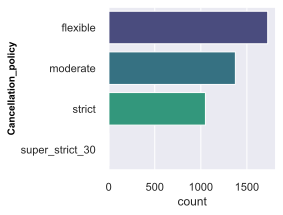

In [58]:
#EDA
#booking_cancel_policy

sns.set(style='darkgrid')
plt.figure(figsize=(3,3))
sns.countplot(y = df['booking_cancel_policy'],order = df['booking_cancel_policy'].value_counts().index,palette = "viridis")
plt.ylabel('Cancellation_policy',fontsize = 10, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

#deze bron https://www.kaggle.com/code/noufalmalki/airbnb-price-prediction-using-xgboost/notebook

Text(0.5, 1.0, '\nMedian Prices by Cancellation Policy\n')

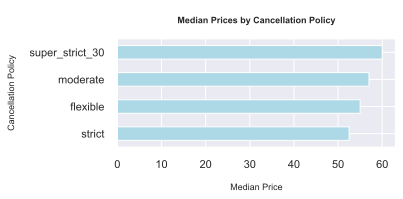

In [60]:
import numpy as np
df_grouped = pd.DataFrame(df.groupby(['booking_cancel_policy'])['target'].agg(np.median))
df_grouped.reset_index(inplace=True)

df_grouped.sort_values(by=['target'], ascending=True)\
          .plot(kind='barh', x='booking_cancel_policy', y='target', 
                figsize=(5,2), legend=False, color='lightBlue')

plt.xlabel('\nMedian Price', fontsize=9)
plt.ylabel('Cancellation Policy\n', fontsize=9)
plt.title('\nMedian Prices by Cancellation Policy\n', fontsize=9, fontweight='bold')


#deze bron: https://www.kaggle.com/code/lowlypalace/airbnb-price-prediction-using-machine-learning

In [37]:
#vroeger################################################################

#df.booking_cancel_policy.unique()
#df = pd.concat([df, pd.get_dummies(df['booking_cancel_policy'], prefix='booking_cancel_policy')],axis=1)
#df = df.drop(['booking_cancel_policy'],axis=1)

In [38]:
print(df['reviews_num'].describe())

count    4152.000000
mean        9.847062
std         9.689841
min         1.000000
25%         2.000000
50%         6.000000
75%        14.000000
max        40.000000
Name: reviews_num, dtype: float64


In [39]:
#EDA
#ik zou in het model steken: reviews_num, reviews_rating, reviews_per_month 
#aangezien ze niet echt multicorrelated zijn EN we ze kunnen bucketen
#er zijn wel altijd 1400 NAs dus mss aparte category maken? deleten? eerder nieuwe obs zonder reviews so far? zie https://nbviewer.org/github/L-Lewis/Airbnb-neural-network-price-prediction/blob/master/Airbnb-price-prediction.ipynb#Categorical-features

#reviews_num
#reviews_rating
#reviews_acc
#reviews_cleanliness
#reviews_checkin
#reviews_communication
#reviews_location
#reviews_value
#reviews_per_month

#reviews_rating geef 69 voor perfect94-100 en voor anderen 66 (er zijn wel 1400 Nas)
#cleanliness geeft 69 voor perfect10 en voor anderen 66 (er zijn wel 1400 Nas) -----> idem location, value, acc
#checkin geen effect
#communication geeft 68 voor perfect9-10 en voor anderen 64 (er zijn wel 1400 Nas)

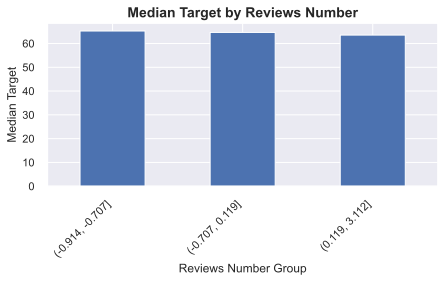

In [70]:
#reviews_num

#brengt weinig inzichten (mean gebruiken ipv median geeft tegenovergestelde, aantal q wijzigen ook)
# Split reviews_num into 3 equally-sized groups
df['reviews_num_group'] = pd.qcut(df['reviews_num'], q=3)

# Calculate median target for each group
median_target = df.groupby('reviews_num_group')['target'].mean()

# Plot median target for each group
plt.figure(figsize=(7,3))
median_target.plot(kind='bar')
plt.title('Median Target by Reviews Number', fontsize=14, fontweight='bold')
plt.xlabel('Reviews Number Group', fontsize=12)
plt.ylabel('Median Target', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


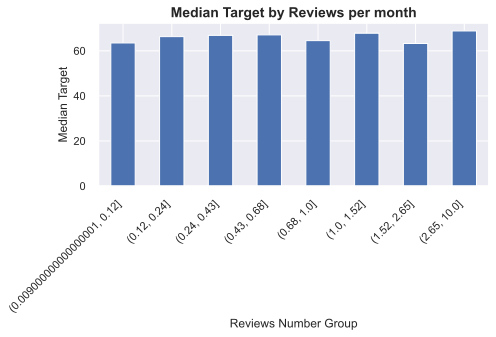

In [41]:
#reviews_per_month

#brengt heel weinig inzichten (mean gebruiken ipv median geeft tegenovergestelde, aantal bins wijzigen ook)
# Split reviews_num into 3 equally-sized groups
df['reviews_per_month_group'] = pd.qcut(df['reviews_per_month'], q=8)

# Calculate median target for each group
median_target = df.groupby('reviews_per_month_group')['target'].mean()

# Plot median target for each group
plt.figure(figsize=(7,3))
median_target.plot(kind='bar')
plt.title('Median Target by Reviews per month', fontsize=14, fontweight='bold')
plt.xlabel('Reviews Number Group', fontsize=12)
plt.ylabel('Median Target', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


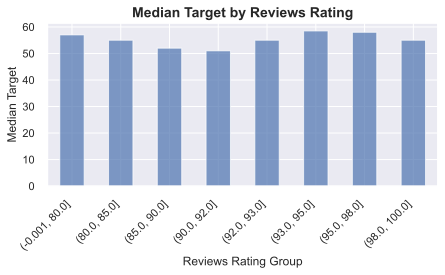

In [42]:
#reviews_rating

#dummy maken van 97-100 en other? results zijn heel verschillend na standaardiseren/meanVSmedian/qWijzigen

# Split reviews_rating into 7 groups
df['reviews_rating_group'] = pd.qcut(df['reviews_rating'], q=10, duplicates='drop')

# Calculate median target for each group
median_target = df.groupby('reviews_rating_group')['target'].median()

# Plot median target for each group
plt.figure(figsize=(7,3))
median_target.plot(kind='bar', color='b', alpha=0.7)
plt.title('Median Target by Reviews Rating', fontsize=14, fontweight='bold')
plt.xlabel('Reviews Rating Group', fontsize=12)
plt.ylabel('Median Target', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


In [43]:
#df['reviews_num'] = pd.qcut(data['reviews_num'], q=3, labels=["reviews_num_low", "reviews_num_medium", "reviews_num_high"])
#df['reviews_per_month'] = pd.qcut(data['reviews_per_month'], q=3, labels=["reviews_per_month_low", "reviews_per_month_medium","reviews_per_month_high"])

In [44]:
#standardize
from sklearn.preprocessing import StandardScaler

# Select the features to be standardized
features_to_standardize = ['reviews_num', 'reviews_rating', 'reviews_acc', 'reviews_cleanliness', 
                          'reviews_checkin', 'reviews_communication', 'reviews_location', 
                          'reviews_value', 'reviews_per_month']

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the selected features
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])


In [45]:
corr_matrix = df[['reviews_num', 'reviews_rating', 'reviews_acc', 'reviews_cleanliness', 'reviews_checkin', 
               'reviews_communication', 'reviews_location', 'reviews_value', 'reviews_per_month','target']].corr()
               
corr_matrix = corr_matrix.rename(columns={'reviews_num': 'Num of Reviews',
                                          'reviews_rating': 'Rating',
                                          'reviews_acc': 'Acc',
                                          'reviews_cleanliness': 'Clean',
                                          'reviews_checkin': 'Checkin',
                                          'reviews_communication': 'Commu',
                                          'reviews_location': 'Location',
                                          'reviews_value': 'Value4Money',
                                          'reviews_per_month': 'perMonth',
                                          'target': 'Target'})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(corr_matrix)


                       Num of Reviews    Rating       Acc     Clean   Checkin  \
reviews_num                  1.000000  0.130776  0.083201  0.094667  0.083856   
reviews_rating               0.130776  1.000000  0.713497  0.694773  0.566119   
reviews_acc                  0.083201  0.713497  1.000000  0.586751  0.545487   
reviews_cleanliness          0.094667  0.694773  0.586751  1.000000  0.438118   
reviews_checkin              0.083856  0.566119  0.545487  0.438118  1.000000   
reviews_communication        0.082129  0.598503  0.556902  0.415793  0.718553   
reviews_location             0.037561  0.488526  0.436610  0.365630  0.366686   
reviews_value                0.057837  0.749339  0.665339  0.606018  0.540753   
reviews_per_month            0.392192  0.137647  0.103541  0.115073  0.090571   
target                      -0.026940  0.025354  0.008785  0.003233  0.004780   

                          Commu  Location  Value4Money  perMonth    Target  
reviews_num            0.082129

In [46]:
#efkes verbergen want slows down anders

#df.plot.scatter(x="reviews_num", y="target", figsize=(5,2), c='dimgrey')
#plt.title('Relation between Number of Reviews & Price\n', fontsize=14, fontweight='bold');

In [47]:
#EDA
#extra (superhost, profile pic etc.)

In [48]:
#Wat ik wil doen is
    #De belangrijkste dummy's in ons model opnemen, de rest niet (zonder overfitting)
    #Door voor alle dummy's én bij interactie te kijken of (1) de mean verschillend is en (2) er voldoende observaties in de subgroep zitten
        #Results:
        #zijn relevant, tenzij we het model op kleine subgroepen willen trainen ook:
            #df['extra: Instant Bookable'] ->> mean is 70.6 ipv 67 (5000 en 1500 observaties)
            #interactie: Host Has Profile Pic, Is Location Exact, Instant Bookable ->> mean is 73 (600 observaties) 
            
            #new interaction:
            #df['int_ProfilePic_Location_InstantBookable'] = df['extra: Host Has Profile Pic'] * df['extra: Is Location Exact'] * df['extra: Instant Bookable']


In [49]:
#Dummy's zijn:
    #extra: Instant Bookable
    #extra: Host Is Superhost
    #extra: Host Identity Verified
    #extra: Is Location Exact
    #extra: Host Has Profile Pic

In [50]:
df['extra'] = df['extra'].fillna('')
extras_list = df['extra'].tolist()
extras_set = set()
for extra_string in extras_list:
    if pd.notnull(extra_string):
        extras = extra_string.split(',')
        for extra in extras:
            stripped_extra = extra.strip()
            if stripped_extra and stripped_extra not in ['Require Guest Phone Verification', 'Require Guest Profile Picture']:
                extras_set.add(stripped_extra)

def new_dum_col_filling(main_col_val, dum_col_name, main_col_name):
    if dum_col_name.replace(main_col_name + ': ', '') in main_col_val:
        return 1
    else:
        return 0
    
def new_set_to_dummies(df, column_name):
    new_all_values_of_sets = extras_set
    new_dummy_columns_name = [column_name + ': ' + dum_col for dum_col in new_all_values_of_sets if dum_col]
    new_dummy_df = pd.DataFrame(0, index=df.index, columns=new_dummy_columns_name)
    for dum_col_name in new_dummy_columns_name:
        for i in df.index:
            new_dummy_df[dum_col_name][i] = new_dum_col_filling(df[column_name][i], dum_col_name, column_name)
    df = pd.concat([df, new_dummy_df], axis=1)
    return df
    
df = new_set_to_dummies(df, 'extra')
    
df = df.drop(['extra'],axis=1)


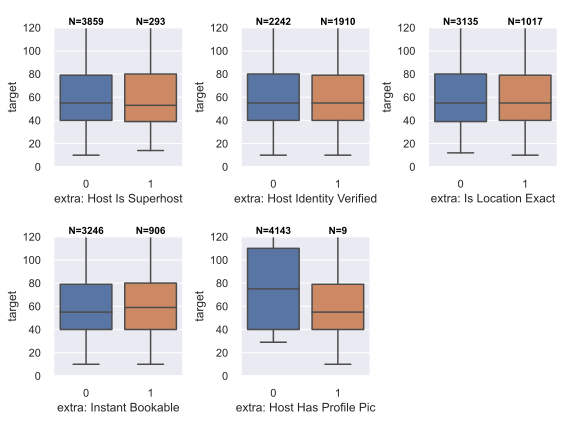

In [51]:
# Define a function to add count labels to boxplot
def add_count_labels(plot, df, column):
    # Get counts per category
    counts = df[column].value_counts()
    # Get y limit of plot
    y_limit = plot.get_ylim()[1]
    # Add count labels to plot
    for i, v in enumerate(counts.values):
        plot.text(i, y_limit*1.02, f'\nN={v}', horizontalalignment='center', size='small', color='black', weight='semibold')

# Create subplots
f, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.4) # adjust space between subplots

# Create boxplots and add count labels
ax1 = plt.subplot(2, 3, 1)
sns.boxplot(data=df, y='target', x='extra: Host Is Superhost')
plt.ylim(0, 120)
add_count_labels(ax1, df, 'extra: Host Is Superhost')

ax2 = plt.subplot(2, 3, 2)
sns.boxplot(data=df, y='target', x='extra: Host Identity Verified')
plt.ylim(0, 120)
add_count_labels(ax2, df, 'extra: Host Identity Verified')

ax3 = plt.subplot(2, 3, 3)
sns.boxplot(data=df, y='target', x='extra: Is Location Exact')
plt.ylim(0, 120)
add_count_labels(ax3, df, 'extra: Is Location Exact')

ax4 = plt.subplot(2, 3, 4)
sns.boxplot(data=df, y='target', x='extra: Instant Bookable')
plt.ylim(0, 120)
add_count_labels(ax4, df, 'extra: Instant Bookable')

ax5 = plt.subplot(2, 3, 5)
sns.boxplot(data=df, y='target', x='extra: Host Has Profile Pic')
plt.ylim(0, 120)
add_count_labels(ax5, df, 'extra: Host Has Profile Pic')

plt.tight_layout() # avoid overlap of plots
plt.draw()


In [52]:
mean1=df.loc[df['extra: Instant Bookable'] == 1]['target'].mean()
mean2=df.loc[df['extra: Instant Bookable'] == 0]['target'].mean()
print("Mean target value for extra: Instant Bookable = 1: {:.2f}".format(mean1))
print("Mean target value for extra: Instant Bookable = 0: {:.2f}".format(mean2))

Mean target value for extra: Instant Bookable = 1: 69.48
Mean target value for extra: Instant Bookable = 0: 64.97


In [53]:
# Calculate mean target and count for each group defined by two columns
df.groupby(['extra: Host Is Superhost', 'extra: Host Identity Verified'])['target'].agg(['mean', 'count']).reset_index()

# Calculate mean target and count for each group defined by three columns
df.groupby(['extra: Host Is Superhost', 'extra: Host Identity Verified', 'extra: Is Location Exact'])['target'].agg(['mean', 'count']).reset_index()

# Calculate mean target and count for each group defined by four columns
df.groupby(['extra: Host Is Superhost', 'extra: Host Identity Verified', 'extra: Is Location Exact', 'extra: Instant Bookable'])['target'].agg(['mean', 'count']).reset_index()

# Calculate mean target and count for each group defined by five columns
df.groupby(['extra: Host Is Superhost', 'extra: Host Identity Verified', 'extra: Is Location Exact', 'extra: Instant Bookable', 'extra: Host Has Profile Pic'])['target'].agg(['mean', 'count']).reset_index()


,extra: Host Is Superhost,extra: Host Identity Verified,extra: Is Location Exact,extra: Instant Bookable,extra: Host Has Profile Pic,mean,count
0,0,0,0,0,0,103.500000,4
1,0,0,0,0,1,63.957265,351
2,0,0,0,1,1,67.333333,108
3,0,0,1,0,0,55.000000,2
4,0,0,1,0,1,64.819588,970
5,0,0,1,1,0,100.666667,3
6,0,0,1,1,1,71.759358,374
7,0,1,0,0,1,63.410891,404
8,0,1,0,1,1,65.800000,85
9,0,1,1,0,1,65.922475,1277


C:\Users\louis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\louis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


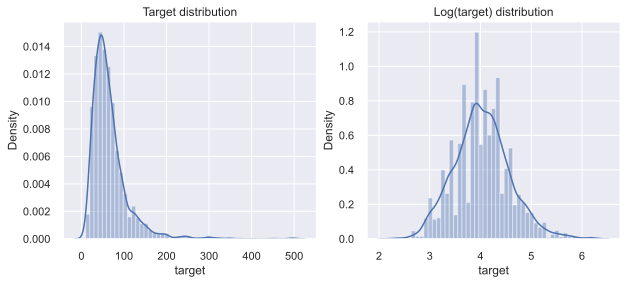

In [61]:
#EDA
#target

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Plot the first graph on the left
sns.distplot(df["target"], ax=axs[0])
axs[0].set_title('Target distribution')

# Plot the second graph on the right
lntarget= np.log(df['target'])
sns.distplot(lntarget, ax=axs[1])
axs[1].set_title('Log(target) distribution')

# Show the plot
plt.show()



In [62]:
print(df['target'].describe())

count    4152.000000
mean       65.951830
std        44.840031
min        10.000000
25%        40.000000
50%        55.000000
75%        79.000000
max       500.000000
Name: target, dtype: float64


The dataset has 4134 rows and 62 columns - after dropping irrelevant rows.


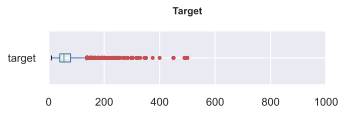

In [63]:
# plot the price distribution box
box_plot = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
price_dist = df['target'].plot(kind='box', xlim=(0,1000), vert=False, flierprops=box_plot, title = "Price", figsize=(5,1));
plt.title('Target\n', fontsize=10, fontweight='bold')
price_dist

#zie https://www.kaggle.com/code/lowlypalace/airbnb-price-prediction-using-machine-learning

# oppassen want in de eerste lijnen code (in v4 etc) worden de observaties met target > 500 euro geelimineerd
# Min target is 10
# 75% of the apartments charge up to €80 - but the maximum value is 950€
# let's decide on a limit of 300$, and drop all outliers that charge more than that

df.drop(df[(df.target > 300)].index, axis=0, inplace=True)
print("The dataset has {} rows and {} columns - after dropping irrelevant rows.".format(*df.shape))

<AxesSubplot:title={'center':'Target\n'}>

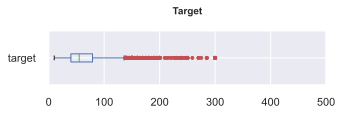

In [64]:
# plot the price distribution box after dropping the listings
box_plot = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
price_dist = df['target'].plot(kind='box', xlim=(0,500), vert=False, flierprops=box_plot, figsize=(5,1));
plt.title('Target\n', fontsize=10, fontweight='bold')
price_dist

In [ ]:
#################################################################


#verder werken


#################################################################

In [ ]:
#amenities_list = []
#
#for element in df.property_amenities:
#    element = element[1:]
#    element = element[:-1]
#    x = element.split()
#    amenities_list.append(len(x))

#df.property_amenities = amenities_list
df.drop(['property_amenities'], axis=1, inplace=True)


In [ ]:
df.head()

In [ ]:
property_room_type = pd.get_dummies(df.property_room_type).astype(int)

In [ ]:
booking_cancel_policy = pd.get_dummies(df.booking_cancel_policy).astype(int)

In [ ]:
df = df.drop(['property_room_type', 'booking_cancel_policy'], axis = 1)
df = pd.concat((df, property_room_type, booking_cancel_policy), axis = 1)

In [ ]:
df = df[df['super_strict_30'] != 1]
df = df.drop('super_strict_30', axis=1)

In [ ]:
df.head()

In [ ]:
# import train_test_split function
from sklearn.model_selection import train_test_split
# import metrics
from sklearn.metrics import mean_squared_error, r2_score

# create target and features
a = df.drop(['target'], axis = 1)
b = df.target

# split our data
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=13)

In [ ]:
# scale data and normalize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [ ]:
from sklearn import linear_model
from sklearn import metrics

# linear regression testing
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
r2_lr = metrics.r2_score(y_test, reg.predict(X_test))

y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

print (f"r2: {round(r2_lr, 5)}")

In [ ]:
# ridge model testing
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
r2_rr = metrics.r2_score(y_test, ridge.predict(X_test))

y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

print (f"r2: {round(r2_rr, 5)}")

In [ ]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
#fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
#plt.subplots_adjust(top=0.93, wspace=0)
    
#ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
#ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
#ax1.set_title('Test set')
#ax1.set_xlabel('Actual values')
#ax1.set_ylabel('Predicted values')
    
#ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
#ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
#ax2.set_title('Train set')
#ax2.set_xlabel('Actual values')
#ax2.set_ylabel('')
#ax2.set_yticklabels(labels='')

#plt.show()

In [ ]:
import xgboost as xgb
# create a baseline
booster = xgb.XGBRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

# create Grid of parameters
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

In [ ]:
# instantiate xgboost with the most optimal parameters
booster = xgb.XGBRegressor(colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, 
                           max_depth=7, n_estimators=100, random_state=4)

# train the model
booster.fit(X_train, y_train)

# predict the values
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 5)}")

In [ ]:
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 5)}")

In [ ]:
# plot the important features
features_importance = pd.Series(booster.feature_importances_, index=a.columns)
features_importance.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(15,5))
plt.xlabel('Relative Feature Importance with XGBoost');

In [ ]:
## Oke nu laden we de test set en doen we alles idem

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test.head()

In [ ]:
# Deleted columns property_id
test.drop(['property_id'], axis=1, inplace=True)

# Deleted columns property_name
test.drop(['property_name'], axis=1, inplace=True)

# Deleted columns property_summary
test.drop(['property_summary'], axis=1, inplace=True)

# Deleted columns property_space
test.drop(['property_space'], axis=1, inplace=True)

# Deleted columns property_desc
test.drop(['property_desc'], axis=1, inplace=True)

# Deleted columns property_neighborhood
test.drop(['property_neighborhood'], axis=1, inplace=True)

# Deleted columns property_notes
test.drop(['property_notes'], axis=1, inplace=True)

# Deleted columns property_transit
test.drop(['property_transit'], axis=1, inplace=True)

# Deleted columns property_access
test.drop(['property_access'], axis=1, inplace=True)

# Deleted columns property_interaction
test.drop(['property_interaction'], axis=1, inplace=True)

# Deleted columns property_rules
test.drop(['property_rules'], axis=1, inplace=True)

# Deleted columns property_zipcode
test.drop(['property_zipcode'], axis=1, inplace=True)

# Deleted columns property_type
test.drop(['property_type'], axis=1, inplace=True)

# Deleted columns property_bed_type
test.drop(['property_bed_type'], axis=1, inplace=True)

# Deleted columns property_sqfeet
test.drop(['property_sqfeet'], axis=1, inplace=True)

# Deleted columns property_scraped_at
test.drop(['property_scraped_at'], axis=1, inplace=True)

# Deleted columns property_last_updated
test.drop(['property_last_updated'], axis=1, inplace=True)

# Deleted columns host_id
test.drop(['host_id'], axis=1, inplace=True)

# Deleted columns host_since
test.drop(['host_since'], axis=1, inplace=True)

# Deleted columns host_location
test.drop(['host_location'], axis=1, inplace=True)

# Deleted columns host_about
test.drop(['host_about'], axis=1, inplace=True)

# Deleted columns host_response_time
test.drop(['host_response_time'], axis=1, inplace=True)

# Deleted columns host_response_rate
test.drop(['host_response_rate'], axis=1, inplace=True)

# Deleted columns host_nr_listings
test.drop(['host_nr_listings'], axis=1, inplace=True)

# Deleted columns host_nr_listings_total
test.drop(['host_nr_listings_total'], axis=1, inplace=True)

# Deleted columns host_verified
test.drop(['host_verified'], axis=1, inplace=True)

# Deleted columns booking_price_covers
test.drop(['booking_price_covers'], axis=1, inplace=True)

# Deleted columns booking_max_nights
test.drop(['booking_max_nights'], axis=1, inplace=True)

# Deleted columns booking_availability_30
test.drop(['booking_availability_30'], axis=1, inplace=True)

# Deleted columns booking_availability_60
test.drop(['booking_availability_60'], axis=1, inplace=True)

# Deleted columns booking_availability_90
test.drop(['booking_availability_90'], axis=1, inplace=True)

# Deleted columns booking_availability_365
test.drop(['booking_availability_365'], axis=1, inplace=True)

# Deleted columns reviews_first
test.drop(['reviews_first'], axis=1, inplace=True)

# Deleted columns reviews_last
test.drop(['reviews_last'], axis=1, inplace=True)

# Deleted columns reviews_acc
test.drop(['reviews_acc'], axis=1, inplace=True)

# Deleted columns reviews_cleanliness
test.drop(['reviews_cleanliness'], axis=1, inplace=True)

# Deleted columns reviews_checkin
test.drop(['reviews_checkin'], axis=1, inplace=True)

# Deleted columns reviews_communication
test.drop(['reviews_communication'], axis=1, inplace=True)

# Deleted columns reviews_location
test.drop(['reviews_location'], axis=1, inplace=True)

# Deleted columns reviews_value
test.drop(['reviews_value'], axis=1, inplace=True)

# Deleted columns extra
test.drop(['extra'], axis=1, inplace=True)

In [ ]:
test.head()

In [ ]:
test['property_bathrooms'] = test['property_bathrooms'].fillna(1)

In [ ]:
test['property_bedrooms'] = test['property_bedrooms'].fillna(1)

In [ ]:
test['reviews_rating'] = test['reviews_rating'].fillna(90)

In [ ]:
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [ ]:
test['property_amenities'] = test['property_amenities'].fillna('')

In [ ]:
test.head()

In [ ]:
#amenities_list_test = []
#
#for element in test.property_amenities:
#    element = element[1:]
#    element = element[:-1]
#    x = element.split()
#    amenities_list_test.append(len(x))
#
#test.property_amenities = amenities_list_test
test.drop(['property_amenities'], axis=1, inplace=True)

In [ ]:
property_room_type_test = pd.get_dummies(test.property_room_type).astype(int)

In [ ]:
booking_cancel_policy_test = pd.get_dummies(test.booking_cancel_policy).astype(int)

In [ ]:
test.head()

In [ ]:
test = test.drop(['property_room_type', 'booking_cancel_policy'], axis = 1)
test = pd.concat((test, property_room_type_test, booking_cancel_policy_test), axis = 1)

In [ ]:
test

In [ ]:
# Get predictions for test set
predictions = booster.predict(test).astype(int)
predictions = np.ceil(predictions)

# Add predictions as a new column to the DataFrame
test['predictions'] = predictions

# Export the DataFrame to a CSV file
test.to_csv('test_predicted2.csv', index=False)

In [ ]:
#predictions

In [ ]:
import os

# Get the path to the desktop
#desktop_path = os.path.expanduser("~/Desktop")

# Export the DataFrame to a CSV file on the desktop
#test.to_csv(os.path.join(desktop_path, "test_predicted2.csv"), index=False)


In [ ]:
####louis
import os
import pandas as pd

# Get the path to the downloads folder
downloads_path = os.path.expanduser("~\\Downloads")

# Export the DataFrame to a CSV file in the downloads folder
test.to_csv(os.path.join(downloads_path, "test_predicted2.csv"), index=False)
